# ASSIGNMENT-1

STUDENT NAME: Aravind Yellanki                           
STUDENT ID: c0908463

In [1005]:
# imports essential libraries for data manipulation and visualization in Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1006]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv") #loading the dataset
df.head(5) #displaying the first 5 records in the dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [1007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [1008]:
df.describe() #describing the dataframe

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [1009]:
df.shape #no.of rows and columns 

(243, 15)

## EXPLORATORY DATA ANALYSIS

In [1010]:
check_duplicates = df.duplicated() #Checking for any duplicates in the dataset
print(check_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool


In [1011]:
df.isnull().sum() #Checking for Missing values

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### ENCODING

In [1012]:
df['Classes'].value_counts #to get the unique count

<bound method IndexOpsMixin.value_counts of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [1013]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1) #converting into numerical datatype

In [1014]:
df.tail(5) #to retrieve the last 5 records

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [1015]:
df.Classes.dtype

dtype('int64')

### OUTLIERS

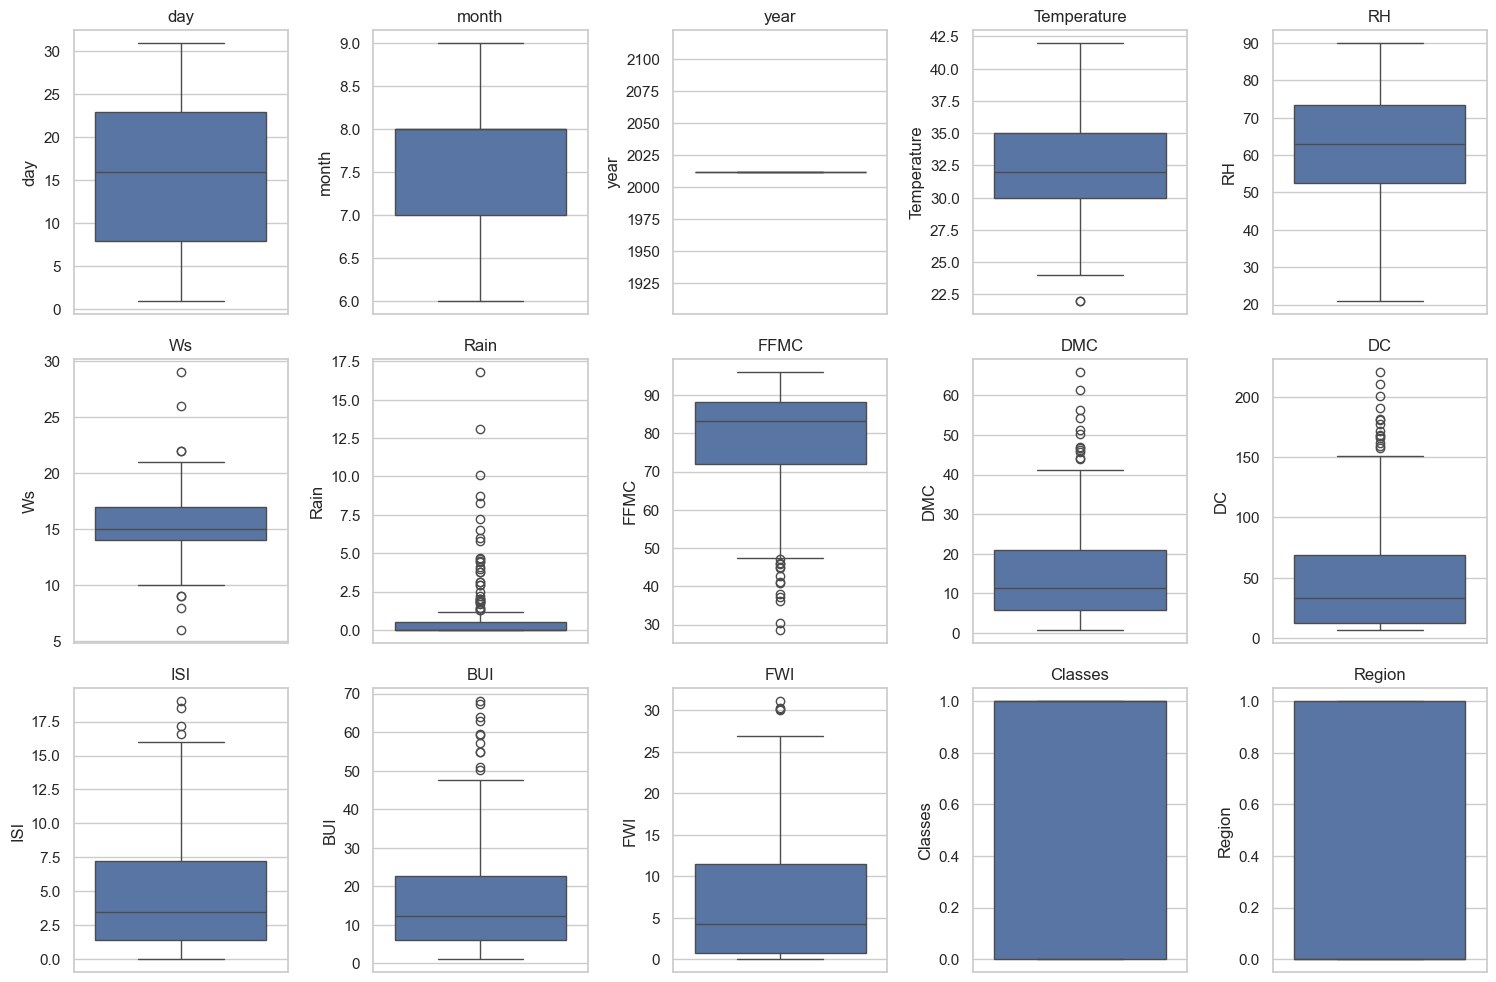

In [1016]:
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 5, i)  # Adjust the layout according to the number of numerical columns
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### CORRELATION

In [1017]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


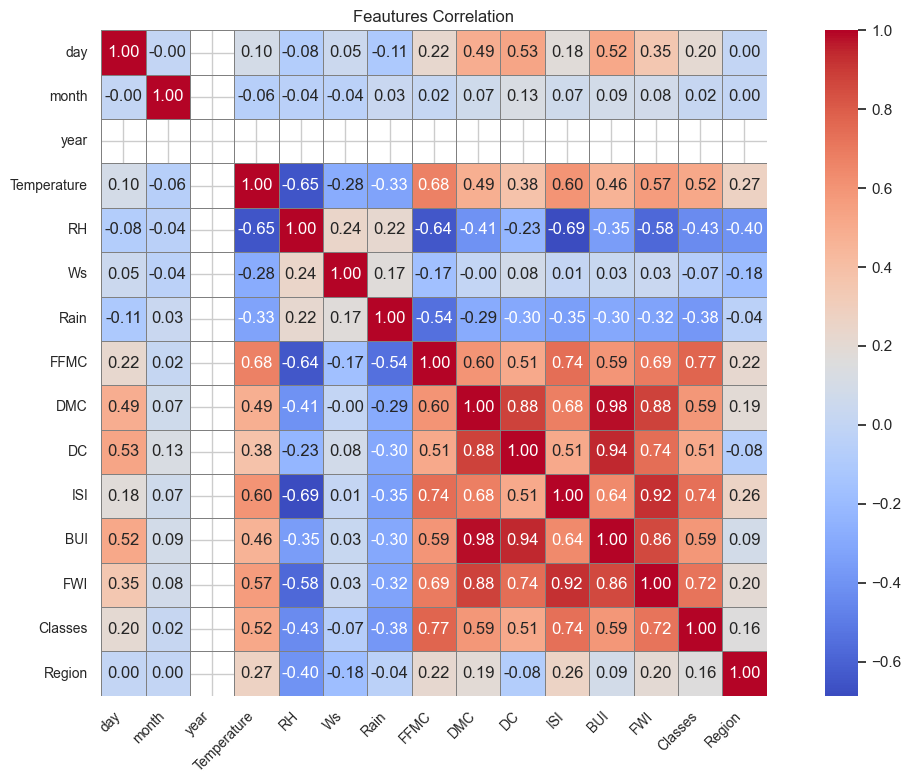

In [1018]:
# Calculate the correlation matrix
df_correlation = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(df_correlation, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5, linecolor='gray')

# Adjust the annotation font size and rotation
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal

# Show the heatmap
plt.title('Feautures Correlation')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [1019]:
# Remove outliers based on a defined threshold (example: using IQR method)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for specified columns
for column in ['Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
 df = remove_outliers_iqr(df, column)

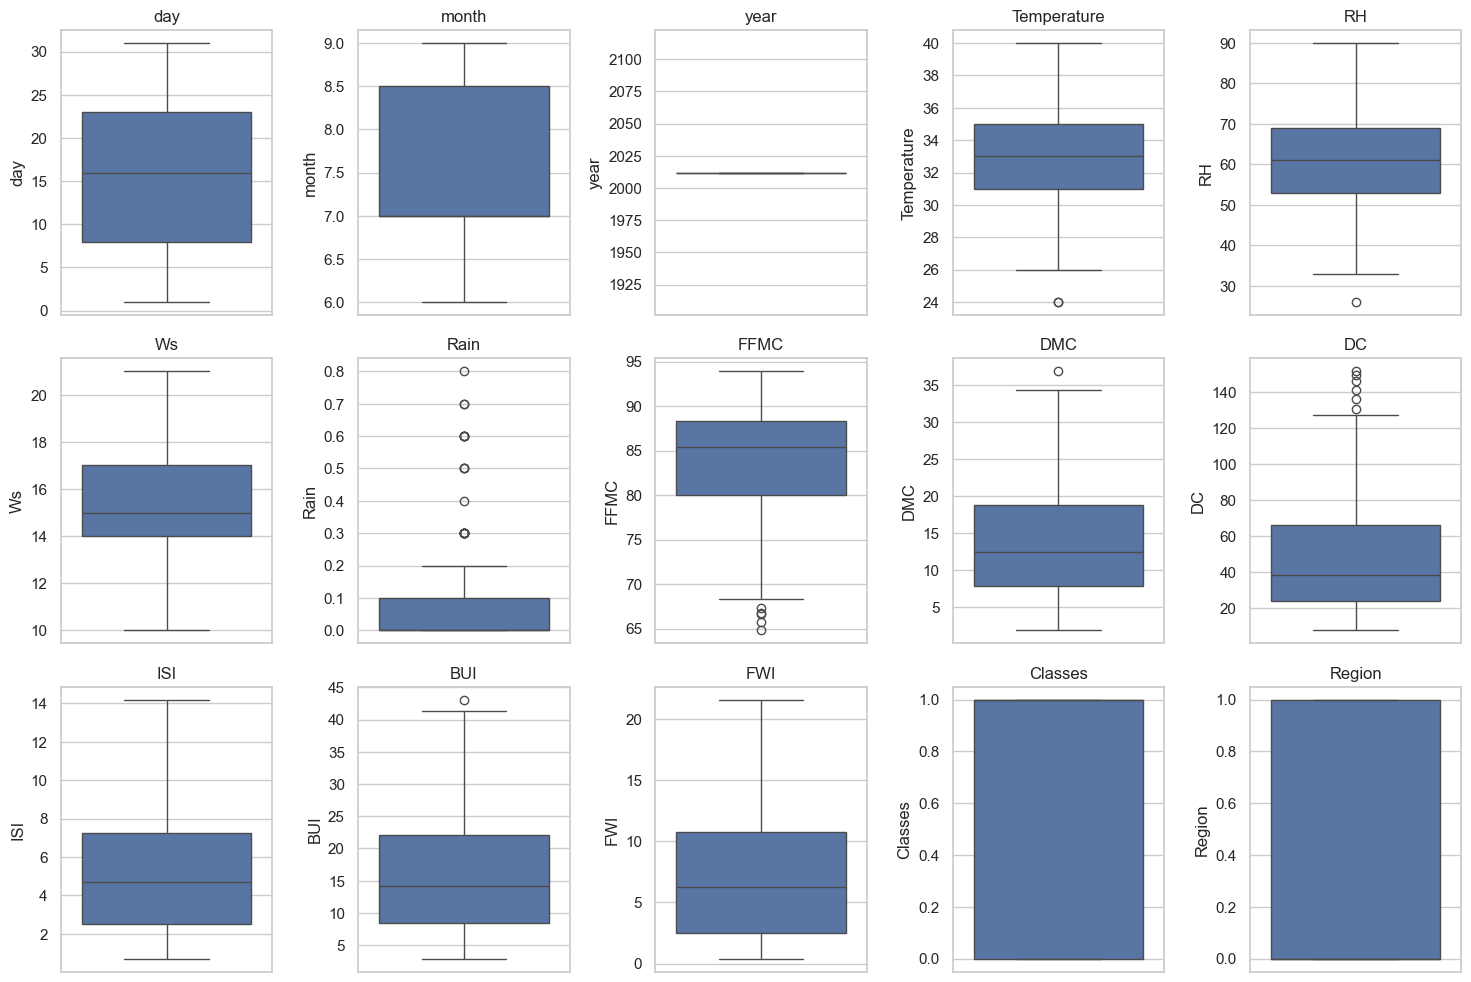

In [1020]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 5, i)  # Adjust the layout according to the number of numerical columns
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### VISUALIZATION

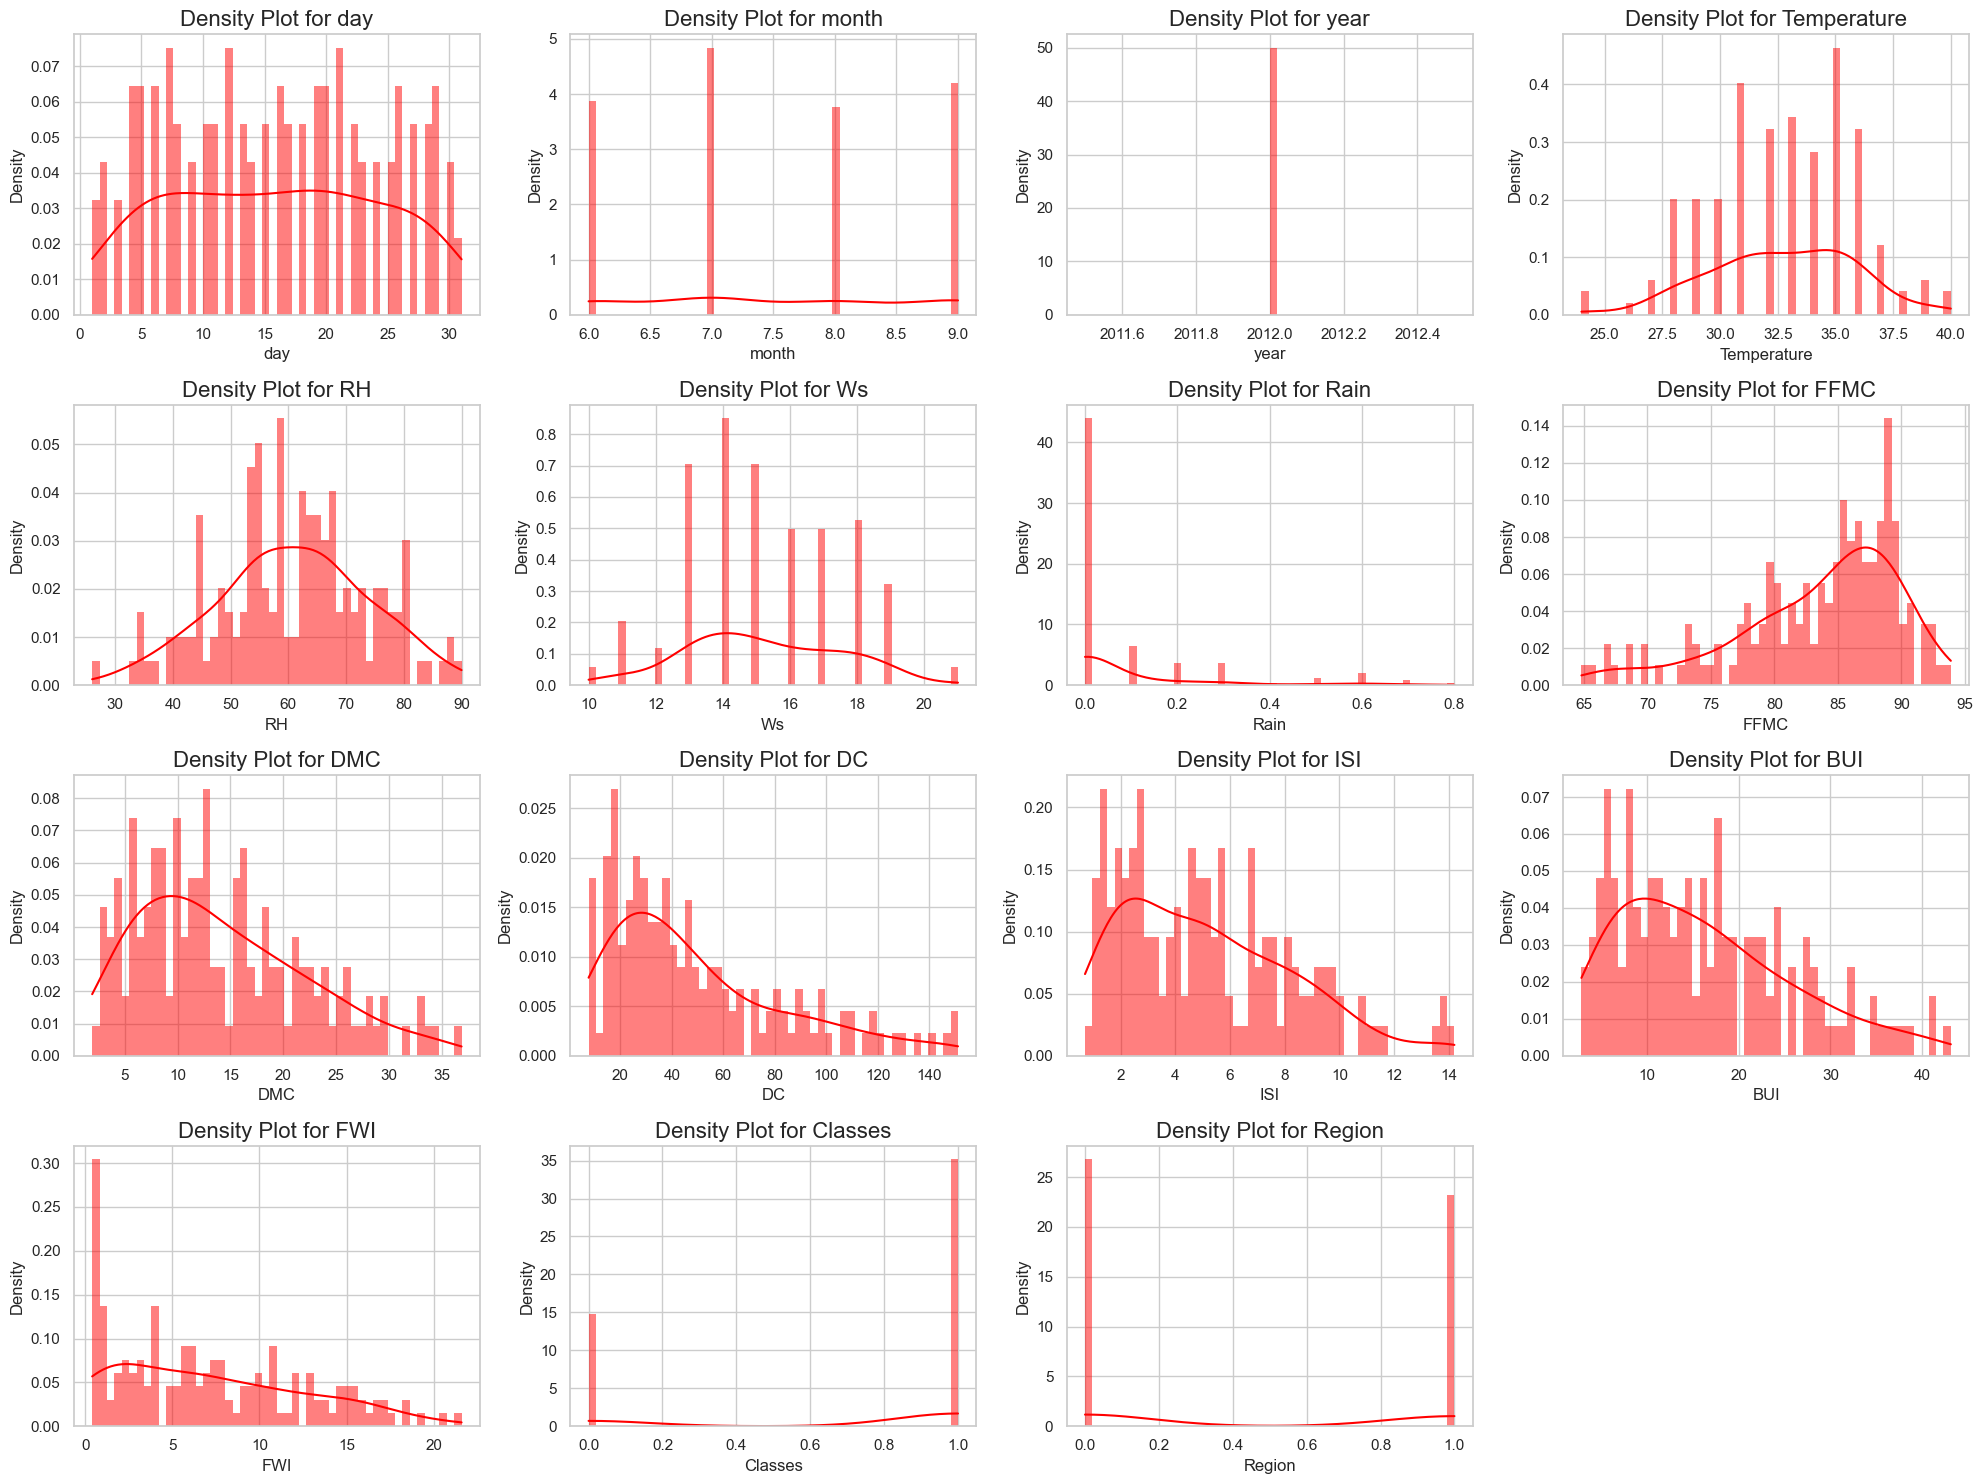

In [1021]:
# visualizes the distribution of all numerical features in the dataset through histograms, helping to understand their underlying patterns.
sns.set(style="whitegrid")

#creating a figure with subplots for each feature
plt.figure(figsize=(20, 15))

#iterating over each column in the DataFrame and plot the histogram and density plot
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # Adjust grid size as needed
    sns.histplot(df[column], bins=50, kde=True, color='red', stat='density', linewidth=0)
    plt.title(f'Density Plot for {column}', fontsize = 16)
    plt.xlabel(column)
    plt.ylabel('Density')
    
plt.tight_layout()
plt.show()

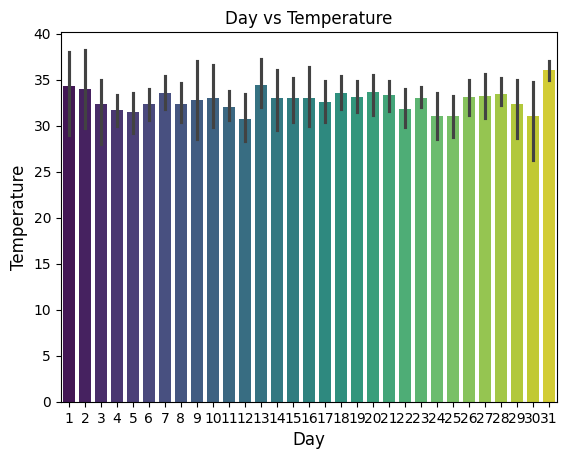

In [1022]:
# Set default style
plt.style.use("default")

# Create a color palette for the bars (you can customize the palette further
custom_palette = sns.color_palette("viridis", len(df['day'].unique()))  # 'viridis' palette

# Plot with customized bar width for gaps and custom colors
sns.barplot(x=df['day'], y=df['Temperature'], data=df, palette=custom_palette, width=0.8)

# Customize the plot title and axis labels
plt.title('Day vs Temperature', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Temperature', fontsize=12)

# Show the plot
plt.show()

In [1023]:
# Calculate percentage for each class
percentage = df['Classes'].value_counts(normalize=True) * 100

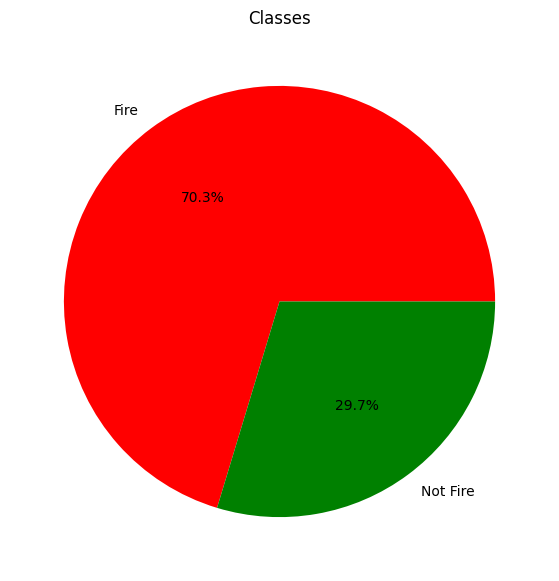

In [1024]:
# Plotting pie chart with custom colors
classlabels = ["Fire", "Not Fire"]
colors = ['red', 'green']  # Set 'Fire' to red and 'Not Fire' to green

plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=classlabels, colors=colors, autopct='%1.1f%%')
plt.title("Classes")
plt.show()

<Axes: ylabel='FWI'>

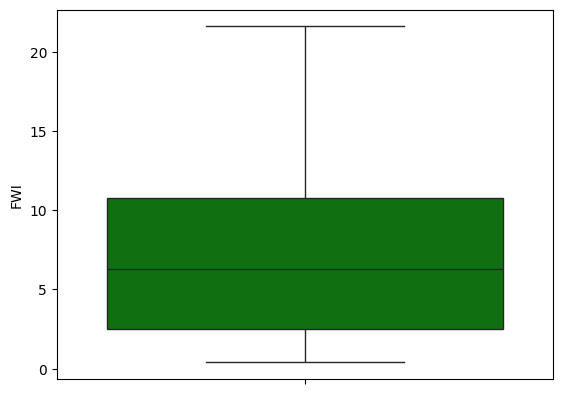

In [1025]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

### MODEL BUILDING

In [1026]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Feature selection and target variable
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = df['FWI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression Model

In [1027]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_linear = linear_model.predict(X_test)

# R² score
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression R² score: {r2_linear}")

# Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MAE: {mae_linear}")

# Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

# Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)
print(f"Linear Regression RMSE: {rmse_linear}")

Linear Regression R² score: 0.9908336285757591
Linear Regression MAE: 0.3355976519134178
Linear Regression MSE: 0.23650936104004078
Linear Regression RMSE: 0.4863222810442071


#### Polynomial Regression Model

In [1028]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)  # Degree of polynomial features
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predictions for the test set
y_pred_poly = poly_model.predict(X_poly_test)

# R² score (accuracy metric for regression)
r2 = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R² score: {r2}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression MAE: {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Polynomial Regression RMSE: {rmse}")

Polynomial Regression R² score: 0.9970438732345718
Polynomial Regression MAE: 0.18821253468913407
Polynomial Regression MSE: 0.07627354599616813
Polynomial Regression RMSE: 0.2761766572253494


#### Regularization Models

In [1029]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value for regularization strength
lasso_model.fit(X_train, y_train)

# Predictions for Lasso
y_pred_lasso = lasso_model.predict(X_test)

# R² score for Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R² score: {r2_lasso}")

# Mean Absolute Error (MAE) for Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression MAE: {mae_lasso}")

# Mean Squared Error (MSE) for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

# Root Mean Squared Error (RMSE) for Lasso
rmse_lasso = np.sqrt(mse_lasso)
print(f"Lasso Regression RMSE: {rmse_lasso}")

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value for regularization strength
ridge_model.fit(X_train, y_train)

# Predictions for Ridge
y_pred_ridge = ridge_model.predict(X_test)

# R² score for Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R² score: {r2_ridge}")

# Mean Absolute Error (MAE) for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression MAE: {mae_ridge}")

# Mean Squared Error (MSE) for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

# Root Mean Squared Error (RMSE) for Ridge
rmse_ridge = np.sqrt(mse_ridge)
print(f"Ridge Regression RMSE: {rmse_ridge}")

Lasso Regression R² score: 0.9918274590161312
Lasso Regression MAE: 0.29961771081845423
Lasso Regression MSE: 0.21086669486867587
Lasso Regression RMSE: 0.4592022374386648
Ridge Regression R² score: 0.9909284399804075
Ridge Regression MAE: 0.3329235453138374
Ridge Regression MSE: 0.23406305118689652
Ridge Regression RMSE: 0.4838006316520231


### MODEL EVALUATION

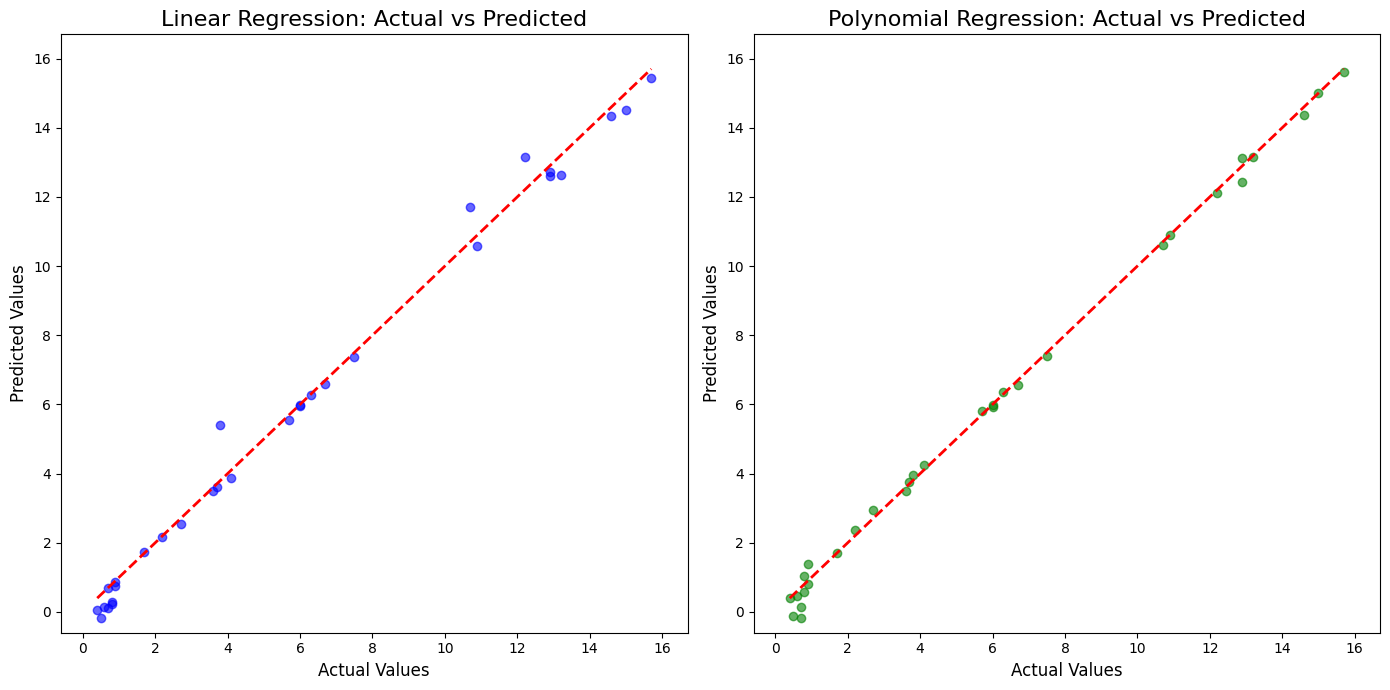

In [1030]:
# Create a figure for the visualizations
plt.figure(figsize=(14, 7))

# Plot actual vs predicted values for Linear Regression
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.title('Linear Regression: Actual vs Predicted', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.xlim(y_test.min() - 1, y_test.max() + 1)
plt.ylim(y_test.min() - 1, y_test.max() + 1)

# Plot actual vs predicted values for Polynomial Regression
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.title('Polynomial Regression: Actual vs Predicted', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.xlim(y_test.min() - 1, y_test.max() + 1)
plt.ylim(y_test.min() - 1, y_test.max() + 1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### CROSS-VALIDATION

In [1031]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a pipeline with Polynomial Features and Linear Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Adjust degree as needed
    ('linear', LinearRegression())
])

# Perform cross-validation
cv_scores = cross_val_score(poly_pipeline, X_train, y_train, cv=5, scoring='r2')  # Using R² as the scoring metric

# Print cross-validation scores and mean score
print(f"Polynomial Regression Cross-Validation R² scores: {cv_scores}")
print(f"Mean R² score from Cross-Validation: {cv_scores.mean()}")

Polynomial Regression Cross-Validation R² scores: [0.99175687 0.99892052 0.99728622 0.99720326 0.98898153]
Mean R² score from Cross-Validation: 0.9948296797191464


#### HYPERPARAMETER TUNING

In [1032]:
# Define a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial features will be added in grid search
    ('linear', LinearRegression())
])

# Define the hyperparameter grid for polynomial degrees
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Different polynomial degrees to test
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print(f"Best Polynomial Degree: {best_params['poly__degree']}")
print(f"Best Cross-Validated R² Score: {best_score}")

# Predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

# Print evaluation metrics for the best model
print(f"Best Polynomial Regression R² score: {r2_best}")
print(f"Best Polynomial Regression MAE: {mae_best}")
print(f"Best Polynomial Regression MSE: {mse_best}")
print(f"Best Polynomial Regression RMSE: {rmse_best}")

Best Polynomial Degree: 2
Best Cross-Validated R² Score: 0.9948296797191464
Best Polynomial Regression R² score: 0.9970438732345718
Best Polynomial Regression MAE: 0.18821253468913407
Best Polynomial Regression MSE: 0.07627354599616813
Best Polynomial Regression RMSE: 0.2761766572253494


### PICKLE FILE CREATION

In [1033]:
import joblib

# Create the pickle file
# Save the polynomial regression model along with the polynomial features
model_filename = 'polynomial_model.pkl'
joblib.dump((poly, poly_model), model_filename)

print(f"Model saved as {model_filename}")

Model saved as polynomial_model.pkl


### TESTING

In [1034]:
import joblib
import numpy as np

# Load the saved model and polynomial features from the pickle file
model_filename = 'polynomial_model.pkl'
poly, loaded_model = joblib.load(model_filename)

# Example unseen data 
unseen_data = np.array([[20, 50, 6, 0, 85, 7, 100, 6, 22],  # Example 1
                        [25, 45, 5, 0.1, 90, 8, 95, 5, 20]])  # Example 2

# Transform the unseen data using the loaded polynomial features
X_unseen_poly = poly.transform(unseen_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_unseen_poly)

# Print the predictions
for i, pred in enumerate(predictions):
    print(f"Prediction of FWI Score {i + 1}: {pred}")

Prediction of FWI Score 1: 10.004627704620361
Prediction of FWI Score 2: 9.626749515533447
